In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *
from pylab import rcParams
import matplotlib

# configuration
# resolution = "0p1"
resolution = "500"
region = [-180,180,-60,90]
data_path = f'/tera04/zhwei/xionghui/bedrock/run/{resolution}/'
post_data_path = '/tera04/zhwei/xionghui/bedrock/'
shp_path = '/tera04/zhwei/xionghui/bedrock/Shp/'
fig_path = f'/home/xuxh22/stu01/Bedrock/fig/{resolution}/'
path = '/home/xuxh22/stu01/Bedrock/'
if resolution == "0p1":
    size = 0.1
elif resolution == "500":
    size = 0.0005

pd.set_option('display.max_columns', None)
# font = {'family': 'Times New Roman'}
font = {'family': 'Arial'}
matplotlib.rc('font', **font)

params = {'backend': 'ps',
          'axes.labelsize': 25,
          'grid.linewidth': 0.2,
          'font.size': 25,
          'legend.fontsize': 18,
          'legend.frameon': False,
          'xtick.labelsize': 30,
          'xtick.direction': 'out',
          'ytick.labelsize': 30,
          'ytick.direction': 'out',
          'legend.handlelength': 1,
          'legend.handleheight': 1,
          'savefig.bbox': 'tight',
          'axes.unicode_minus': False,
          "mathtext.default":"regular",
          'text.usetex': False}
rcParams.update(params)

In [2]:
df = pd.read_csv(f'{data_path}csv/Global_PR.csv')
df

,Unnamed: 0,lat,lon,mask1234,Sbedrock,Sr,Dbedrock_Frequency,PR_mean,ET_mean,Area
0,708161369,-55.847917,-67.627083,1.0,0.236460,0.236460,1.0,692.439940,2.555584,120515.621801
1,708161370,-55.847917,-67.622916,1.0,0.279453,0.279453,1.0,691.950130,3.020087,120515.621801
2,708161371,-55.847917,-67.618749,1.0,0.322446,0.322446,1.0,691.460270,3.484589,120515.621801
3,708161372,-55.847917,-67.614583,1.0,0.365440,0.365440,1.0,690.970400,3.949091,120515.621801
4,708161373,-55.847917,-67.610416,1.0,0.408433,0.408433,1.0,690.480600,4.413592,120515.621801
...,...,...,...,...,...,...,...,...,...,...
157069426,3586500782,82.960414,-26.739583,1.0,39.301605,39.301605,1.0,125.175170,107.267190,26309.225697
157069427,3586500783,82.960414,-26.735417,1.0,39.884820,39.884820,1.0,125.231810,107.503296,26309.225697
157069428,3586500784,82.960414,-26.731250,1.0,40.468037,40.468037,1.0,125.288445,107.739400,26309.225697
157069429,3586500785,82.960414,-26.727083,1.0,41.051250,41.051250,1.0,125.345085,107.975510,26309.225697


In [ ]:
# df = df[df['Sbedrock'] > 0]

# print(df["P/Sbedrock_div_Sr"].mean())
# print(df["P/Sbedrock_div_ET_mean"].mean())
# print(df["P/Sbedrock_div_PR_mean"].mean())
# print(df["P/ET_mean_div_PR_mean"].mean())
# print(df["P/ET_mean_sub_Sbedrock_div_PR_mean"].mean())
# print(df["P/Q_mean_div_PR_mean"].mean())
# print(df["P/PET_div_PR_mean"].mean())

In [3]:
df['Dbedrock_Frequency'] = df['Dbedrock_Frequency'].astype('int64')
df['Dbedrock_Frequency'] = df['Dbedrock_Frequency'].replace(4, 2)

n1 = len(df[df['Dbedrock_Frequency']==1])
n2 = len(df[df['Dbedrock_Frequency']==2])
# n3 = len(df[df['Dbedrock_Frequency']==4])
print(n1,n2)
n = [n1,n2]

df['Sbedrock_div_PR']=df['Sbedrock']/df['PR_mean']*100
df['Sbedrock_div_ET']=df['Sbedrock']/df['ET_mean']*100
df['Dbedrock_Frequency'] = df['Dbedrock_Frequency'].astype(str)
# df = df[df['Dbedrock_Frequency'] != '4']

# print(df['Dbedrock_Frequency'].describe())

size1 = 30
size2 = 24

df['Dbedrock_Frequency'] = pd.Categorical(df['Dbedrock_Frequency'], categories=["1", "2"], ordered=True)
df


54928849 102140582


,Unnamed: 0,lat,lon,mask1234,Sbedrock,Sr,Dbedrock_Frequency,PR_mean,ET_mean,Area,Sbedrock_div_PR,Sbedrock_div_ET
0,708161369,-55.847917,-67.627083,1.0,0.236460,0.236460,1,692.439940,2.555584,120515.621801,0.034149,9.252665
1,708161370,-55.847917,-67.622916,1.0,0.279453,0.279453,1,691.950130,3.020087,120515.621801,0.040386,9.253147
2,708161371,-55.847917,-67.618749,1.0,0.322446,0.322446,1,691.460270,3.484589,120515.621801,0.046633,9.253501
3,708161372,-55.847917,-67.614583,1.0,0.365440,0.365440,1,690.970400,3.949091,120515.621801,0.052888,9.253771
4,708161373,-55.847917,-67.610416,1.0,0.408433,0.408433,1,690.480600,4.413592,120515.621801,0.059152,9.253986
...,...,...,...,...,...,...,...,...,...,...,...,...
157069426,3586500782,82.960414,-26.739583,1.0,39.301605,39.301605,1,125.175170,107.267190,26309.225697,31.397285,36.638981
157069427,3586500783,82.960414,-26.735417,1.0,39.884820,39.884820,1,125.231810,107.503296,26309.225697,31.848793,37.101021
157069428,3586500784,82.960414,-26.731250,1.0,40.468037,40.468037,1,125.288445,107.739400,26309.225697,32.299896,37.561038
157069429,3586500785,82.960414,-26.727083,1.0,41.051250,41.051250,1,125.345085,107.975510,26309.225697,32.750586,38.019038


In [ ]:
# fig = plt.figure(figsize=(18, 8))
# sns.boxenplot(x="Dbedrock_Frequency", y="P/Sbedrock_div_Sr", data=df, linewidth=3,
#               hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
# ax = plt.gca()

# ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
# ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

# for spine in ax.spines.values():
#     spine.set_edgecolor('black')  
#     spine.set_linewidth(3)  

# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

# plt.ylim(0, 100)


# plt.xlabel('')  
# plt.ylabel("Percentage of root-zone water storage \ncapacity accomodated by bedrock \n($S_{bedrock}$/$S_{r}$)", fontsize=size1, fontweight='bold')  

# current_ticks = [0,1,2]

# new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
#                         'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
#                         'Bedrcok water \nnot needed to explain ET \nover course of study']

# plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

# yticks = np.arange(0, 120, 20)
# plt.yticks(ticks=yticks, labels=yticks,fontsize=size1, fontweight='bold')
# plt.show()
# # fig.savefig('boxenplot2.pdf')

In [4]:
size1 = 60

([<matplotlib.axis.YTick at 0x15349435f9a0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

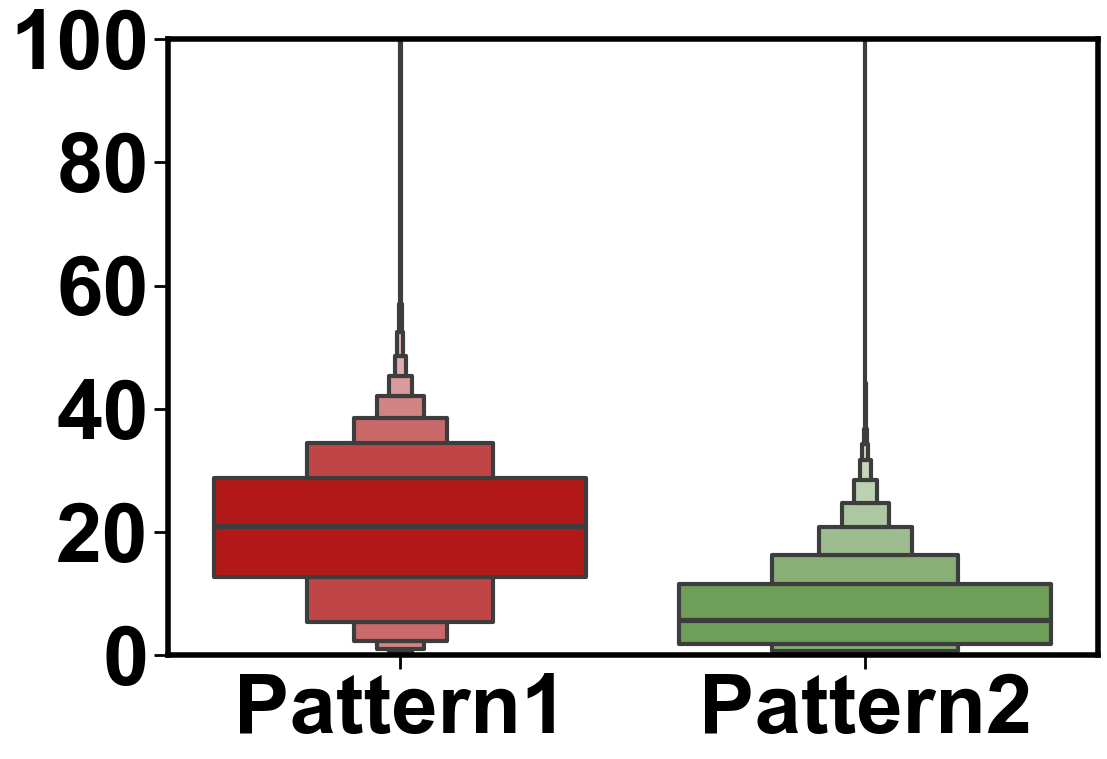

In [5]:
fig = plt.figure(figsize=(12, 8))
# colors = ['#69aa4c','#CC0000','#ebc874']
colors = ['#CC0000','#69aa4c',]
sns.boxenplot(x="Dbedrock_Frequency", y="Sbedrock_div_ET", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=colors,
              outlier_prop=0.0078125, showfliers=False, legend=False)
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(4)  

# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     ax.text(x_pos+0.28, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel('')  

# plt.ylabel("$S_{{bedrock}}$ as a percentage of \nmean annual evapotranspiration (%)", fontsize=size1, fontweight='bold')  

current_ticks = [0,1]

# new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
#                         'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
#                         'Bedrcok water \nnot needed to explain ET \nover course of study']
new_labels = ['Pattern1','Pattern2']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

([<matplotlib.axis.YTick at 0x153494014ca0>,
 [Text(0, 0, '0'),
  Text(0, 20, '20'),
  Text(0, 40, '40'),
  Text(0, 60, '60'),
  Text(0, 80, '80'),
  Text(0, 100, '100')])

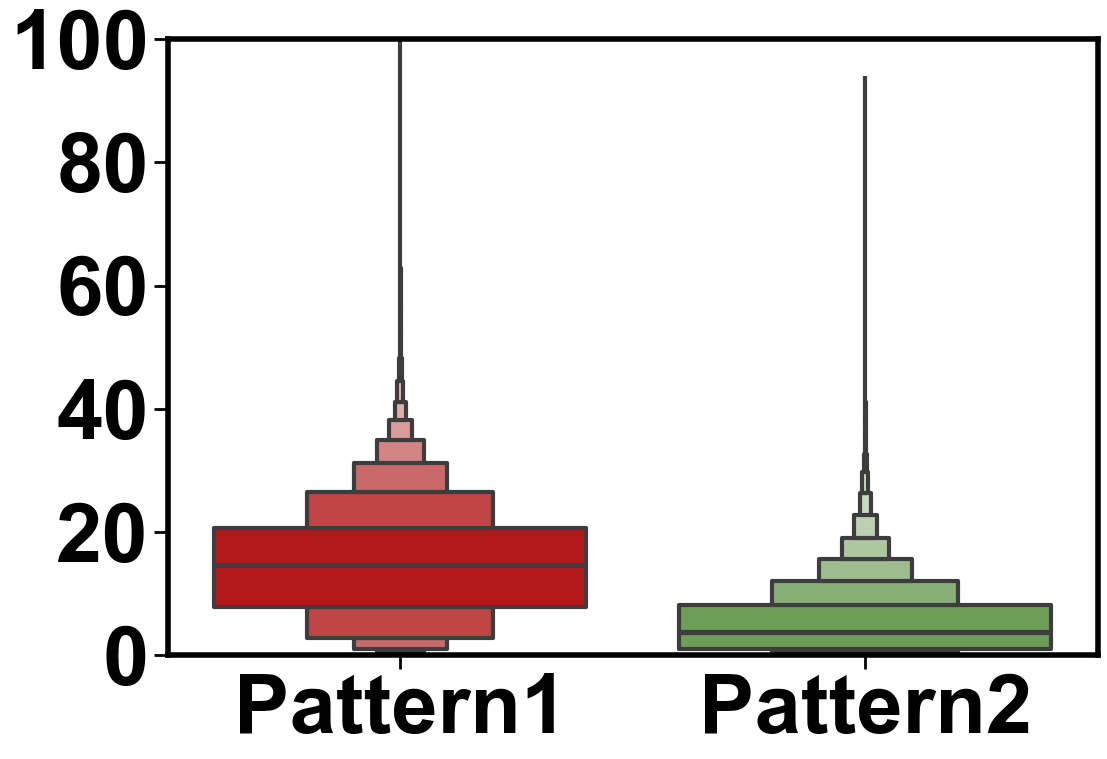

In [6]:
fig = plt.figure(figsize=(12, 8))
# colors = ['#69aa4c','#CC0000','#ebc874']
colors = ['#CC0000','#69aa4c',]
sns.boxenplot(x="Dbedrock_Frequency", y="Sbedrock_div_PR", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=colors,
              outlier_prop=0.0078125, showfliers=False, legend=False)
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(4)  

# for i, label in enumerate(ax.get_xticklabels()):
#     x_pos = label.get_position()[0]
#     ax.text(x_pos+0.28, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel('')  
# plt.ylabel("$S_{{bedrock}}$ as a percentage of \nmean annual precipitation (%)", fontsize=size1, fontweight='bold')  

current_ticks = [0,1]

# new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
#                         'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
#                         'Bedrcok water \nnot needed to explain ET \nover course of study']
new_labels = ['Pattern1','Pattern2']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

In [ ]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/ET_mean_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.38, 88, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("$ET_{mean}$ / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

In [ ]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/ET_mean_sub_Sbedrock_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("($ET_{mean}$ - $S_{bedrock}$) / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

In [ ]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/Q_mean_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("$Q_{mean}$/$PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')

In [ ]:
fig = plt.figure(figsize=(18, 8))
sns.boxenplot(x="Dbedrock_Frequency", y="P/PET_div_PR_mean", data=df, linewidth=3,
              hue='Dbedrock_Frequency',palette=sns.husl_palette(4, s=0.90, l=0.65, h=0.0417))
                
ax = plt.gca()

ax.tick_params(axis='x', which='major', length=10, width=2, direction='out')
ax.tick_params(axis='y', which='major', length=10, width=2, direction='out')

for spine in ax.spines.values():
    spine.set_edgecolor('black')  
    spine.set_linewidth(3)  

for i, label in enumerate(ax.get_xticklabels()):
    x_pos = label.get_position()[0]
    ax.text(x_pos+0.3, 85, f'{n[i]}', ha='center', va='bottom', fontsize=size1, fontweight='bold', color='black')

plt.ylim(0, 100)


plt.xlabel('')  
plt.ylabel("PET / $PR_{mean}$", fontsize=size1, fontweight='bold')  

current_ticks = [0,1,2]

new_labels = ['Bedrcok water \nwithdrawn every year \nfrom 2003 to 2020', 
                        'Bedrcok water \nwithdrawn some year(s) \nfrom 2003 to 2020', 
                        'Bedrcok water \nnot needed to explain ET \nover course of study']

plt.xticks(ticks=current_ticks, labels=new_labels, fontsize=size1, fontweight='bold')

yticks =np.linspace(0,100,6).astype('int64')
plt.yticks(ticks=yticks,labels=yticks,fontsize=size1, fontweight='bold')